# Handwritten digit classification using Keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the MNIST dataset 
mnist = tf.keras.datasets.mnist

# Create Training and Test sets
(x_train,y_train), (x_test,y_test) = mnist.load_data()

# Normalize the data by dividing their maximum values
(x_train,x_test) = tf.cast(x_train/np.max(x_train),tf.float32), tf.cast(x_test/np.max(x_test),tf.float32)
(y_train,y_test) = tf.cast(y_train,tf.int64), tf.cast(y_test,tf.int64)
print(x_train)

tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]

In [5]:
# Step - 1: Define the Model. Four layer Network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = 'relu')) # Hidden Layer 1 with 256 neurons
model.add(tf.keras.layers.Dense(128, activation = 'relu')) # Hidden Layer 2 with 128 neurons
model.add(tf.keras.layers.Dense(10, activation = 'softmax')) # Output Layer with 10 neurons as Image number are bertween 0 to 9

In [6]:
# Step - 2: Compile the Model by using Stocastic Gradient Decent
model.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [7]:
# Step - 3: Train the Model
model.fit(x_train, y_train, batch_size = 32, epochs = 10)
model.save("mnist-model.h5")

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6063 - accuracy: 0.8391
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2833 - accuracy: 0.9187
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2288 - accuracy: 0.9346
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1941 - accuracy: 0.9444
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1681 - accuracy: 0.9517
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1488 - accuracy: 0.9570
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1334 - accuracy: 0.9618
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1202 - accuracy: 0.9663
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1093 - accuracy: 0.9693
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.100

In [8]:
# Evaluate the Model on Test set
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9695


[0.10475467890501022, 0.9695000052452087]

In [9]:
# Load the Model Weights
model.load_weights("mnist-model.h5")

Actual Digit in Image:  tf.Tensor(5, shape=(), dtype=int64)


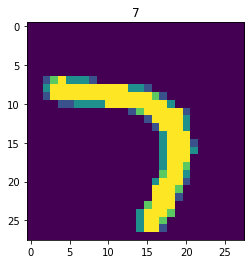

Predicted Digit in Image:  7


In [12]:
# Predict the new Image
img = x_test[60]
test_img = tf.reshape(img,(1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]

print("Actual Digit in Image: ", y_test[120])
# Plot the Actual Image
img = tf.reshape(img,(28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

print("Predicted Digit in Image: ", classname)